In [61]:
#imports
from skimage import io
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from math import sqrt

In [62]:
#load bands
B4_before = io.imread('E:/Company/KAVOSHGARAN/Virtual Irrigation/Image/Change_detection/Before/B4.tif')
B4_after = io.imread('E:/Company/KAVOSHGARAN/Virtual Irrigation/Image/Change_detection/After/B4.tif')

B6_before = io.imread('E:/Company/KAVOSHGARAN/Virtual Irrigation/Image/Change_detection/Before/B6.tif')
B6_after = io.imread('E:/Company/KAVOSHGARAN/Virtual Irrigation/Image/Change_detection/After/B6.tif')

B7_before = io.imread('E:/Company/KAVOSHGARAN/Virtual Irrigation/Image/Change_detection/Before/B7.tif')
B7_after = io.imread('E:/Company/KAVOSHGARAN/Virtual Irrigation/Image/Change_detection/After/B7.tif')



In [63]:
#using detection
sub = (B4_before)-(B4_after)
div = (B4_before)/(B4_after)

#Before and After Burn
nbr_before = (B4_before - B7_before) / (B4_before + B7_after)
nbr_after = (B4_after - B7_after) / (B4_after + B7_after)
sub_nbr = nbr_before - nbr_after

D:\Program Files\Anaconda\Run\envs\mahdi\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [64]:
#THRESHOLD
thr = 0.6
burn = sub_nbr > thr

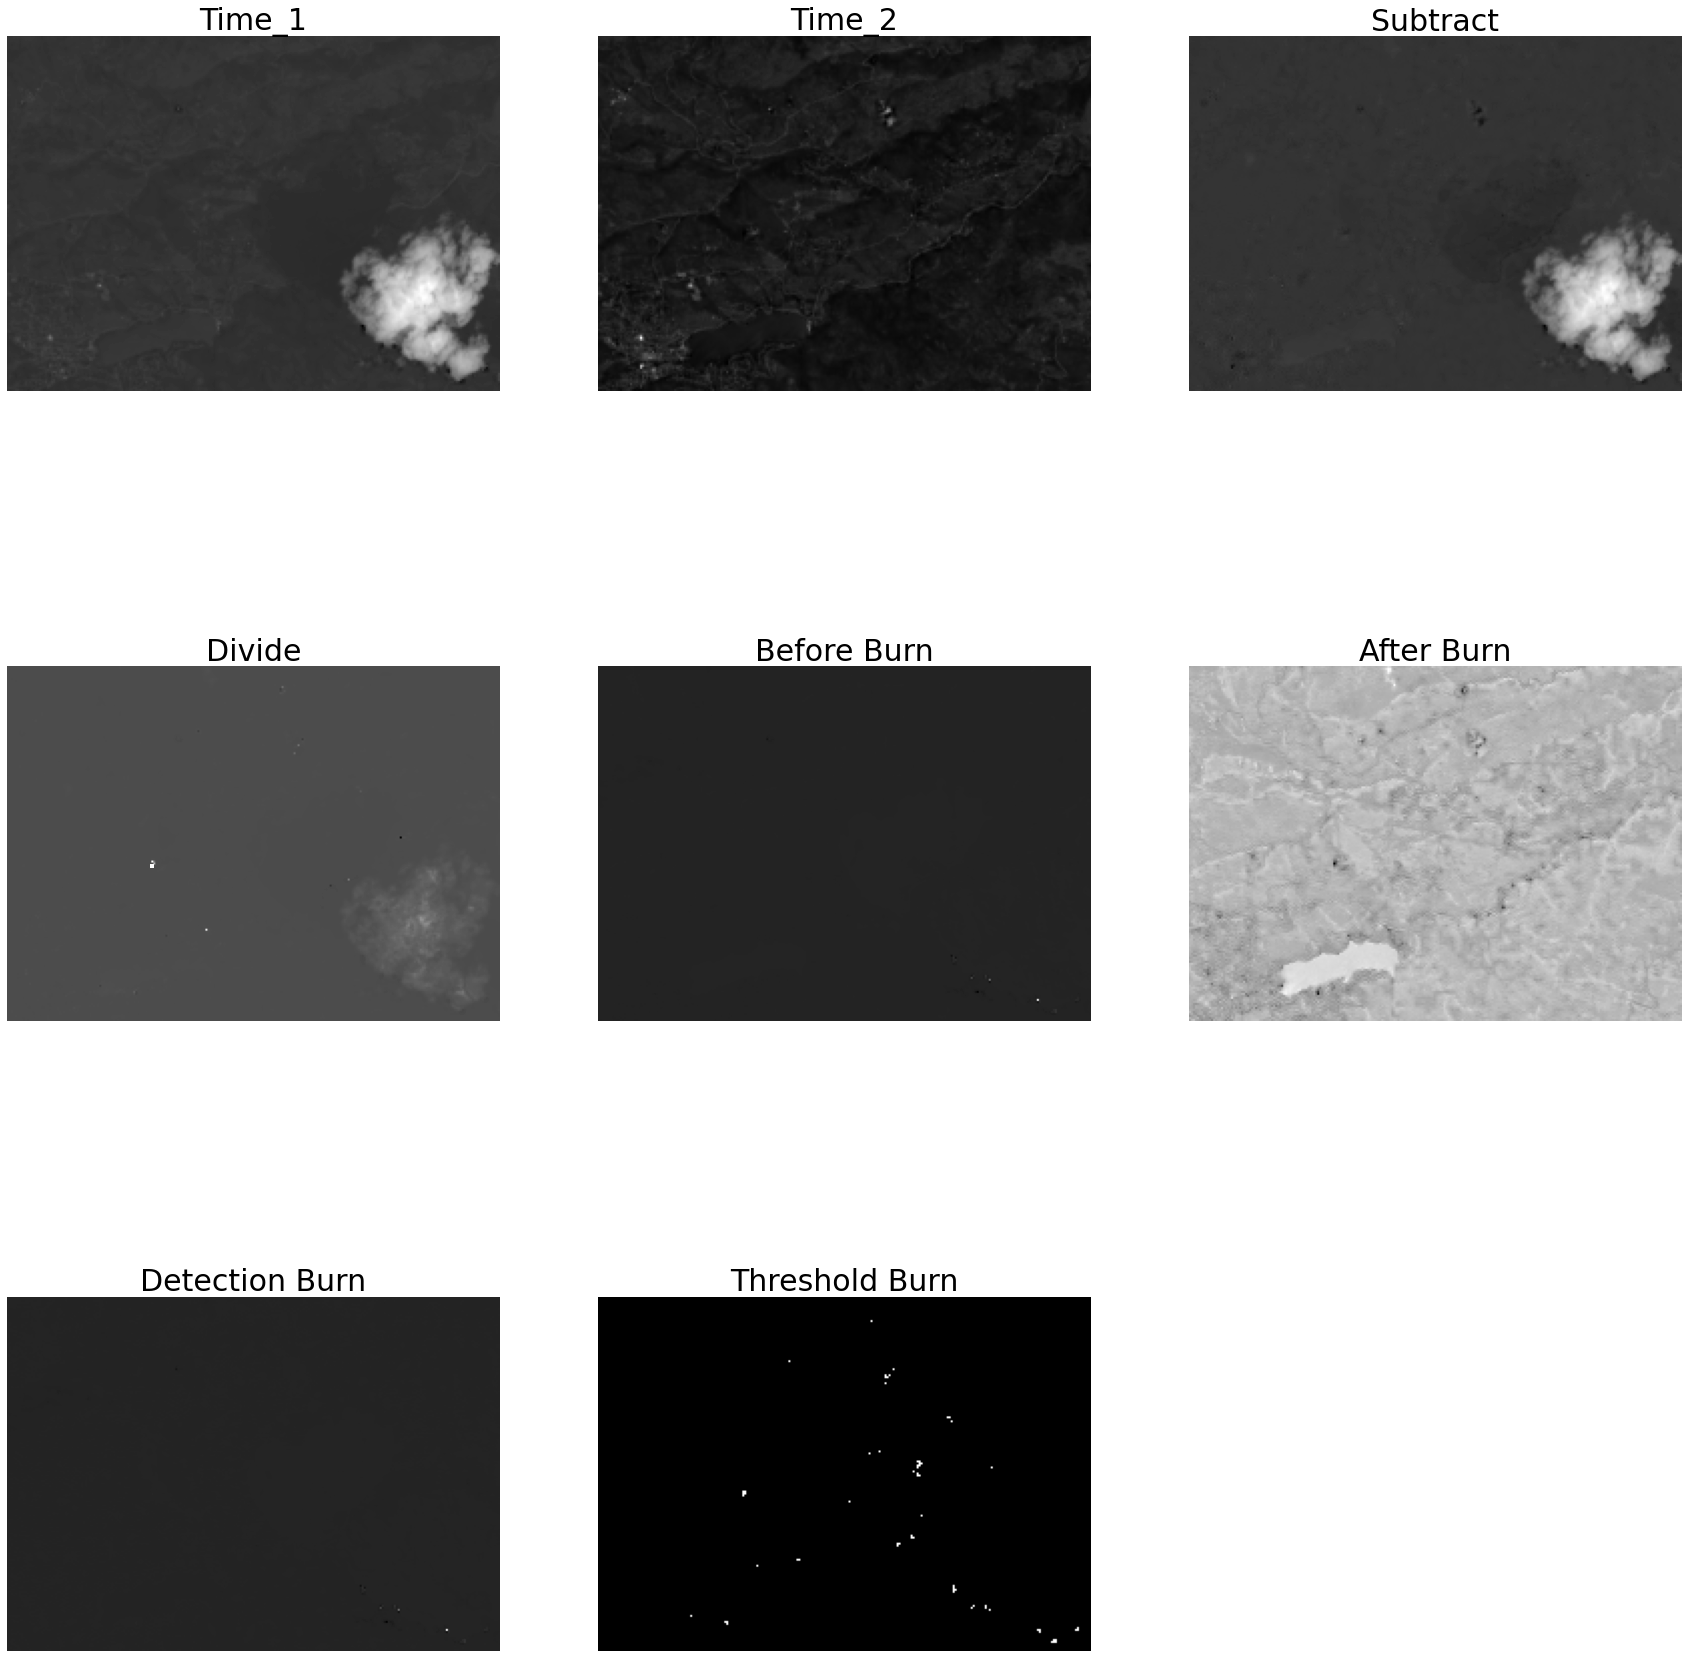

In [65]:
#demonstrate
#Before
plt.figure(figsize=(30,30))
plt.subplots_adjust(hspace=0.7)
plt.subplot(3,3,1)
plt.imshow(B4_before , cmap ='gray')
plt.title('Time_1' , fontsize = 30)
plt.axis('off')
#after
plt.subplots_adjust(hspace=0.7)
plt.subplot(3,3,2)
plt.imshow(B4_after , cmap ='gray')
plt.title('Time_2', fontsize = 30)
plt.axis('off')
#subtract
plt.subplots_adjust(hspace=0.7)
plt.subplot(3,3,3)
plt.imshow(sub , cmap ='gray')
plt.title('Subtract', fontsize = 30)
plt.axis('off')
#devide
plt.subplots_adjust(hspace=0.7)
plt.subplot(3,3,4)
plt.imshow(div , cmap ='gray')
plt.title('Divide', fontsize = 30)
plt.axis('off')
#before_burn
plt.subplots_adjust(hspace=0.7)
plt.subplot(3,3,5)
plt.imshow(nbr_before , cmap ='gray')
plt.title('Before Burn', fontsize = 30)
plt.axis('off')
#after burn
plt.subplots_adjust(hspace=0.7)
plt.subplot(3,3,6)
plt.imshow(nbr_after , cmap ='gray')
plt.title('After Burn', fontsize = 30)
plt.axis('off')
#detection burn
plt.subplots_adjust(hspace=0.7)
plt.subplot(3,3,7)
plt.imshow(sub_nbr , cmap ='gray')
plt.title('Detection Burn', fontsize = 30)
plt.axis('off')
#threshold
plt.subplots_adjust(hspace=0.7)
plt.subplot(3,3,8)
plt.imshow(burn , cmap ='gray')
plt.title('Threshold Burn', fontsize = 30)
plt.axis('off')

plt.savefig('C:/Users/Lenovo/Desktop/Virtual-Irrigation/Image_processing/change_detection/images/pic1.png')
plt.show()

# CVA (Magnitude and Direction)


In [66]:
#load band5
B5_before = io.imread('E:/Company/KAVOSHGARAN/Virtual Irrigation/Image/Change_detection/Before/B5.tif')
B5_after = io.imread('E:/Company/KAVOSHGARAN/Virtual Irrigation/Image/Change_detection/After/B5.tif')

In [67]:
#magnitude and Dierction empty matrix
CM = np.empty(B4_before.shape)
CD = np.empty(B4_before.shape)

In [68]:
#using fomula to detection CM and CD
for i in range(len(B4_after)):
    for j in range(len(B4_after[0])):
        
        change_magnitude = sqrt((B4_before[i][j] - B4_after[i][j])**2 + (B5_before[i][j] - B5_after[i][j])**2)
        
        if B4_after[i][j] - B4_before[i][j] < 0 and B5_after[i][j] - B5_before[i][j] < 0 :
            change_direction = 1
            
        elif B4_after[i][j] - B4_before[i][j] > 0 and B5_after[i][j] - B5_before[i][j] < 0 :
            change_direction = 2
        
        elif B4_after[i][j] - B4_before[i][j] < 0 and B5_after[i][j] - B5_before[i][j] > 0 :
            change_direction = 3
        
        elif B4_after[i][j] - B4_before[i][j] > 0 and B5_after[i][j] - B5_before[i][j] > 0 :
            change_direction = 4
            
        
        CM[i][j] = change_magnitude
        CD[i][j] = change_direction       

In [69]:
CD

array([[4., 4., 4., ..., 1., 1., 1.],
       [4., 4., 4., ..., 1., 1., 1.],
       [4., 4., 4., ..., 4., 1., 3.],
       ...,
       [1., 2., 2., ..., 2., 4., 4.],
       [4., 3., 1., ..., 1., 1., 4.],
       [1., 2., 4., ..., 1., 1., 1.]])

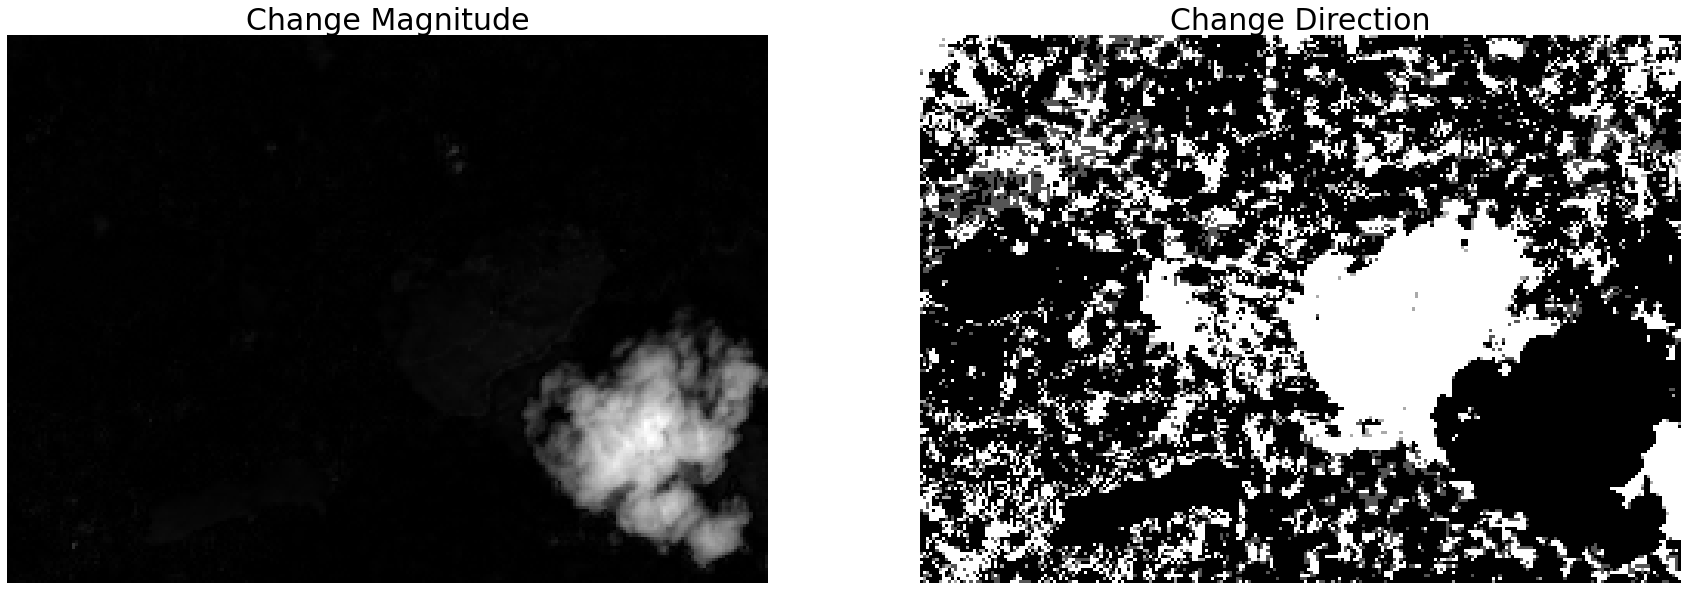

In [70]:
#demonstrate

plt.figure(figsize=(30,30))
plt.subplots_adjust(hspace=0.7)
plt.subplot(1,2,1)
plt.imshow(CM , cmap ='gray')
plt.title('Change Magnitude' , fontsize = 30)
plt.axis('off')

plt.subplots_adjust(hspace=0.7)
plt.subplot(1,2,2)
plt.imshow(CD , cmap ='gray')
plt.title('Change Direction', fontsize = 30)
plt.axis('off')

plt.savefig('C:/Users/Lenovo/Desktop/Virtual-Irrigation/Image_processing/change_detection/images/pic2.png')
plt.show()

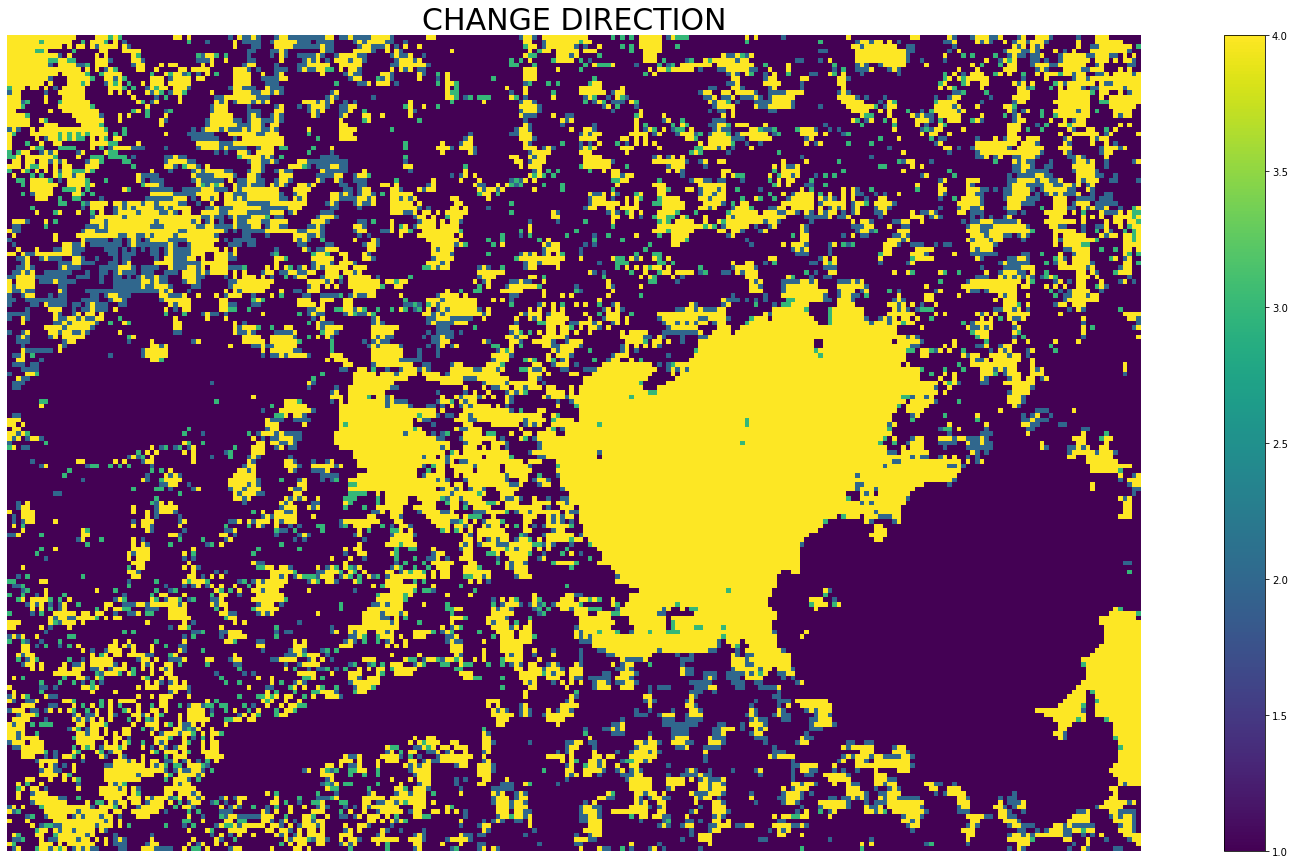

In [71]:
plt.figure(figsize=(30,15))
plt.subplots_adjust(hspace=0.7)
plt.imshow(CD)
plt.title('CHANGE DIRECTION', fontsize = 30)
plt.axis('off')
plt.colorbar()
plt.savefig('C:/Users/Lenovo/Desktop/Virtual-Irrigation/Image_processing/change_detection/images/pic3.png')
plt.show()